Importing the Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



Data Collection and Processing

In [3]:
# Loading the csv file to a Pandas DataFrame

heart_data = pd.read_csv("/content/heart.csv")

In [6]:
# Print first 5 rows of the Dataset

heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
# Print last 5 rows of the Dataset

heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [8]:
# Numbers of Rows and Columns in the Dataset

heart_data.shape

(1025, 14)

In [9]:
# Getting some info about the Data

heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


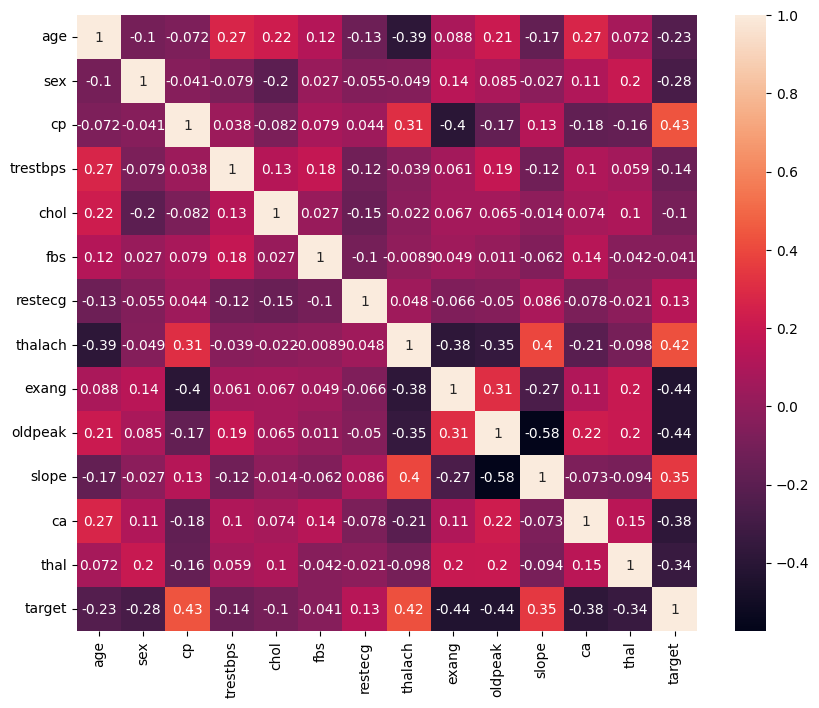

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(heart_data.corr(), annot=True)
plt.show()

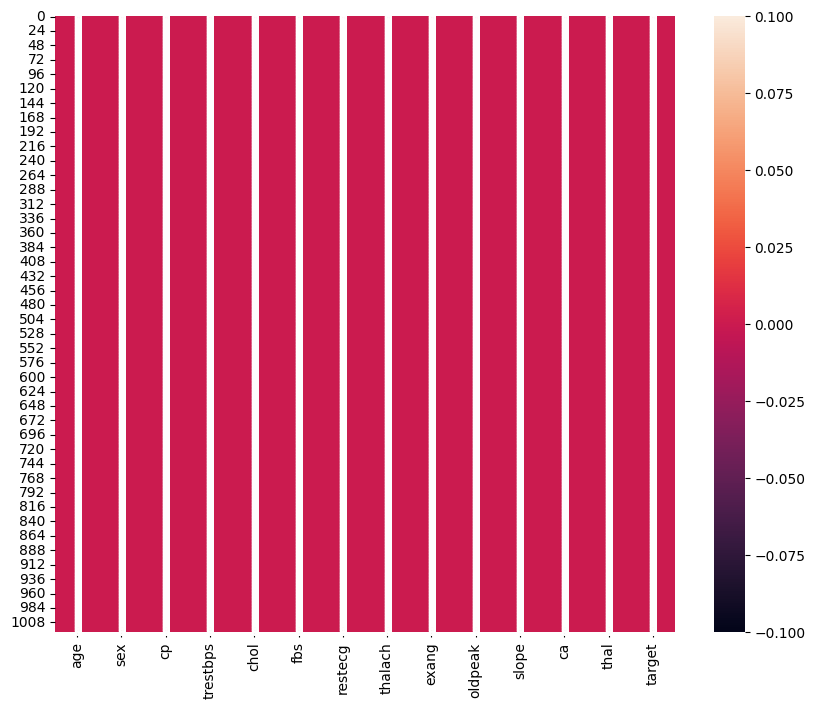

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(heart_data.isnull(), annot=True)
plt.show()

In [10]:
# Checking for missing values

heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [11]:
# Statistical measures about the data

heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
# Checking the distribution of Target Variable

heart_data['target'].value_counts()

,count
target,
1,526
0,499


1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [14]:
X = heart_data.drop(columns='target',axis=1)
Y = heart_data['target']

In [15]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal
0      52    1   0       125   212    0        1      168      0      1.0      2   2     3
1      53    1   0       140   203    1        0      155      1      3.1      0   0     3
2      70    1   0       145   174    0        1      125      1      2.6      0   0     3
3      61    1   0       148   203    0        1      161      0      0.0      2   1     3
4      62    0   0       138   294    1        1      106      0      1.9      1   3     2
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...    ...  ..   ...
1020   59    1   1       140   221    0        1      164      1      0.0      2   0     2
1021   60    1   0       125   258    0        0      141      1      2.8      1   1     3
1022   47    1   0       110   275    0        0      118      1      1.0      1   1     2
1023   50    0   0       110   254    0        0      159      0      0.0      2   0     2

In [16]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


Splitting the data into Training Data & Test data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [18]:
print(X.shape, X_train.shape, Y_test.shape)

(1025, 13) (820, 13) (205,)


Model Training

Logistic Regression


In [44]:
model = LogisticRegression()
# Training the Logistic Regression model with Training Data

model.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
# Accuracy on Training Data

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy on Training Data: ' , training_data_accuracy)

# Accuracy on Test Data

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test Data: ', test_data_accuracy)

Accuracy on Training Data:  0.8524390243902439
Accuracy on Test Data:  0.8048780487804879


Random Forest Model

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)

print("Model Accuracy: ", accuracy)

Model Accuracy:  1.0


Building a Predictive System

In [38]:
input_data = (48,1,1,130,245,0,0,180,0,0.2,1,0,2)

# Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
  print("The Person does not have a Heart Disease\n")
else :
  print("The Person has a Heart Disease\n")

[1]
The Person has a Heart Disease



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [39]:
# Check for another Input Data

input_data = (54,1,0,124,266,0,0,109,1,2.2,1,1,3)

# Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
  print("The Person does not have a Heart Disease\n")
else :
  print("The Person has a Heart Disease\n")

[0]
The Person does not have a Heart Disease



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
